In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding="latin-1")
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [5]:
df.shape

(60943, 12)

In [6]:
df.groupby('Item')['Y2015', 'Y2018'].sum()

C:\Users\user\AppData\Local\Temp/ipykernel_14876/1099779414.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Item')['Y2015', 'Y2018'].sum()


,Y2015,Y2018
Item,,
"Alcohol, Non-Food",2180.00,2293.00
Alcoholic Beverages,98783.72,97847.27
Animal Products,11811.73,11578.61
Animal fats,200675.72,269648.27
Apples and products,10559.15,9640.51
...,...,...
"Vegetables, Other",158104.08,163987.21
Vegetal Products,107064.17,107775.39
Wheat and products,234710.51,242645.19


In [7]:
df['Y2014'].isna().sum()

1589

In [8]:
df['Y2014'].isna().value_counts(normalize=True)

False    0.973926
True     0.026074
Name: Y2014, dtype: float64

In [9]:
df.groupby('Element')['Y2017'].sum()

Element
Domestic supply quantity                  2088198.10
Export Quantity                            182338.80
Fat supply quantity (g/capita/day)          10253.84
Feed                                       223705.68
Food                                      1258888.28
Food supply (kcal/capita/day)              454681.00
Food supply quantity (kg/capita/yr)         48690.04
Import Quantity                            294559.09
Losses                                     160614.00
Other uses (non-food)                       91645.97
Processing                                 292836.00
Production                                2030056.89
Protein supply quantity (g/capita/day)      11842.45
Residuals                                   35500.00
Seed                                        24870.14
Stock Variation                             54316.91
Total Population - Both sexes             1112641.00
Tourist consumption                            91.00
Name: Y2017, dtype: float64

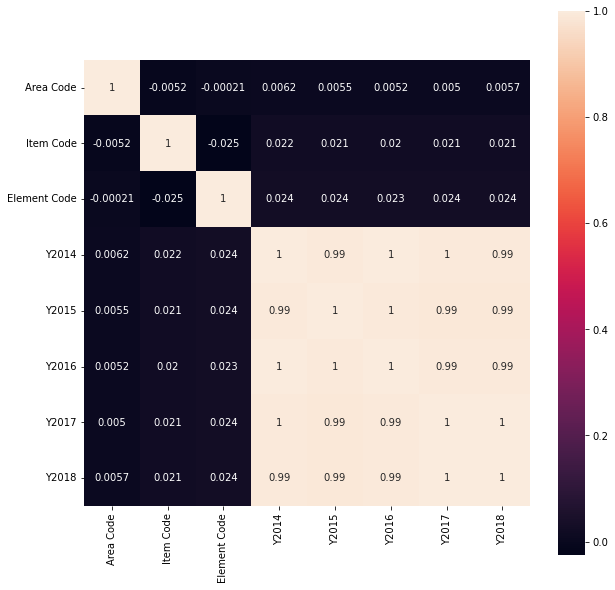

In [12]:
correlations = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlations, square=True, annot=True);

In [17]:
df.groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


In [18]:
df['Y2017'].describe()

count     59437.000000
mean        140.917765
std        1671.862359
min       -1582.000000
25%           0.000000
50%           0.100000
75%           9.000000
max      190873.000000
Name: Y2017, dtype: float64

In [24]:
df_mad = df[df['Area'] == "Madagascar"]
df_mad.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
30715,129,Madagascar,2501,Population,511,Total Population - Both sexes,1000 persons,23590.0,24234.0,24894.0,25571.0,26262.0
30716,129,Madagascar,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.0,0.0,0.0,0.0,0.0


In [26]:
df_mad.groupby('Element')['Y2015'].sum()

Element
Domestic supply quantity                  31214.98
Export Quantity                             494.75
Fat supply quantity (g/capita/day)           91.85
Feed                                       2070.22
Food                                      21120.65
Food supply (kcal/capita/day)              7685.00
Food supply quantity (kg/capita/yr)         871.59
Import Quantity                            1721.80
Losses                                     2176.00
Other uses (non-food)                      3957.12
Processing                                 1803.00
Production                                29482.89
Protein supply quantity (g/capita/day)      173.05
Residuals                                  -616.00
Seed                                        699.00
Stock Variation                            -505.00
Total Population - Both sexes             24234.00
Name: Y2015, dtype: float64

In [28]:
df['Area'].nunique()

49

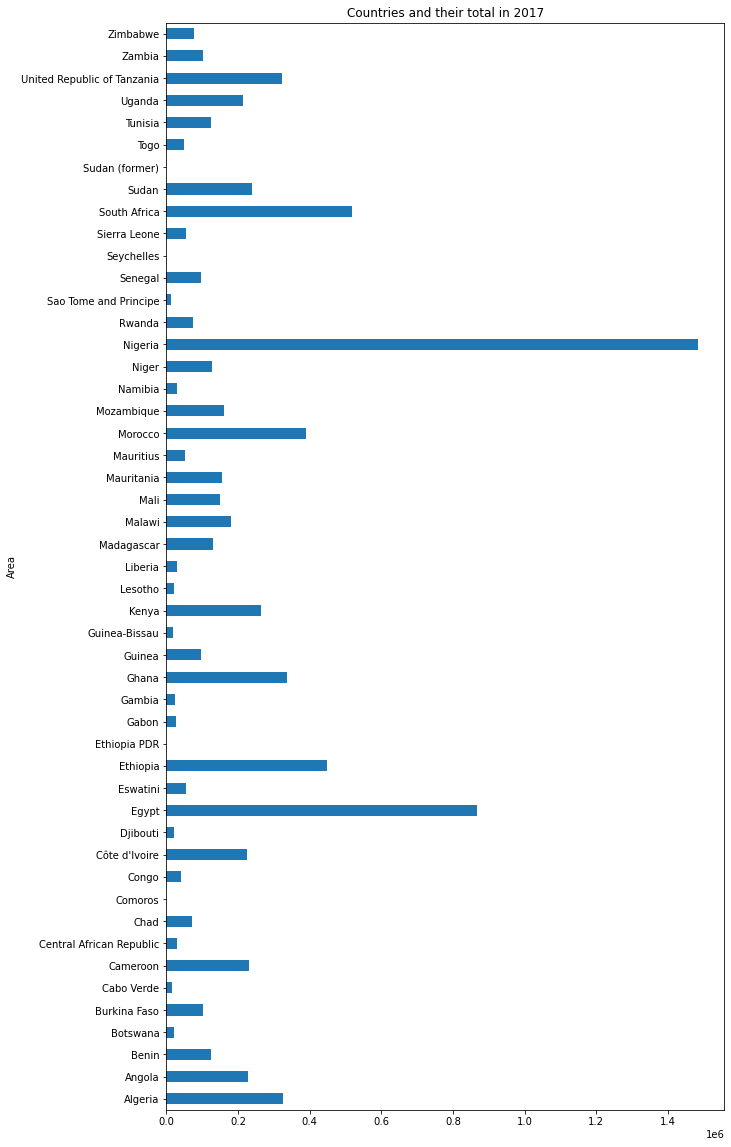

In [34]:
plt.figure(figsize=(10,20))
df.groupby('Area')['Y2017'].sum().plot(kind='barh', title='Countries and their total in 2017');

In [35]:
df.groupby('Area')['Y2017'].sum().nsmallest(n=10)

Area
Ethiopia PDR                 0.00
Sudan (former)               0.00
Comoros                     59.84
Seychelles                 442.34
Sao Tome and Principe    12662.63
Cabo Verde               14650.74
Guinea-Bissau            19102.77
Lesotho                  21267.96
Botswana                 22101.30
Djibouti                 22729.91
Name: Y2017, dtype: float64

In [36]:
df.groupby('Area')['Y2017'].sum().nlargest(n=10)

Area
Nigeria                        1483268.23
Egypt                           866379.92
South Africa                    517590.54
Ethiopia                        448683.76
Morocco                         388495.36
Ghana                           337599.06
Algeria                         325644.27
United Republic of Tanzania     322616.85
Kenya                           264660.66
Sudan                           239931.92
Name: Y2017, dtype: float64